# Training GAN with BCE Loss on MNIST

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torchvision.utils import make_grid

import numpy as np
import matplotlib.pyplot as plt

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [3]:
torch.manual_seed(0)
np.random.seed(0)

In [4]:
BATCH_SIZE = 128
LR = 1e-5
NUM_EPOCHES = 200

## Preprocessing

In [5]:
transform = transforms.Compose([
    transforms.ToTensor(),
])

In [6]:
trainset = datasets.MNIST('../data/MNIST/', download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=BATCH_SIZE, shuffle=True)

## Model

In [7]:
from gans_package.models import GAN_Generator, GAN_Discriminator

In [8]:
latent_dim = 64
g_out_size = 784
g_hidden_size = 128
g_num_layers = 4

d_hidden_size = 512
d_num_layers = 3

g = GAN_Generator(latent_dim, g_out_size, g_hidden_size, g_num_layers).to(device)
d = GAN_Discriminator(g_out_size, d_hidden_size, d_num_layers).to(device)
print(g)
print(d)

GAN_Generator(
  (generator): Sequential(
    (0): Sequential(
      (0): Linear(in_features=64, out_features=128, bias=True)
      (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (1): Sequential(
      (0): Linear(in_features=128, out_features=256, bias=True)
      (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (2): Sequential(
      (0): Linear(in_features=256, out_features=512, bias=True)
      (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (3): Sequential(
      (0): Linear(in_features=512, out_features=1024, bias=True)
      (1): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (4): Linear(in_features=1024, out_features=784, bias=True)
    (5): Sigmoid()
  )
)
GAN_Discriminator

In [9]:
for img, label in trainloader:
    img = img.to(device)
    label = label.to(device)
    
    noise = torch.randn(img.size(0), latent_dim).to(device)
    
    print("Input Image Dimensions: {}".format(img.size()))
    print("Noise Dimensions: {}".format(noise.size()))
    print("Label Dimensions: {}".format(label.size()))
    print("-"*100)
    
    fake = g(noise)
    pred = d(fake)
    
    print("Fake Output Dimensions: {}".format(fake.size()))
    print("Prediction Output Dimensions: {}".format(pred.size()))
    break

Input Image Dimensions: torch.Size([128, 1, 28, 28])
Noise Dimensions: torch.Size([128, 64])
Label Dimensions: torch.Size([128])
----------------------------------------------------------------------------------------------------
Fake Output Dimensions: torch.Size([128, 784])
Prediction Output Dimensions: torch.Size([128, 1])


## Training

In [10]:
criterion = nn.BCEWithLogitsLoss()
g_optimizer = torch.optim.Adam(g.parameters(), lr=LR)
d_optimizer = torch.optim.Adam(d.parameters(), lr=LR)

Epoch 1: Generator Loss: 1.3678600907579923; Discriminator Loss: 0.42385742875304555
Epoch 2: Generator Loss: 1.6525673721390746; Discriminator Loss: 0.31200534121187
Epoch 3: Generator Loss: 1.9469833615492147; Discriminator Loss: 0.18236623402597554
Epoch 4: Generator Loss: 1.8323096542724415; Discriminator Loss: 0.18506251307311597
Epoch 5: Generator Loss: 1.6872846866721538; Discriminator Loss: 0.2067748989377703


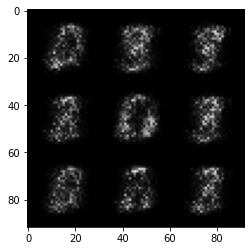

Epoch 6: Generator Loss: 1.922352981974067; Discriminator Loss: 0.16058888586599435
Epoch 7: Generator Loss: 2.2739115864483277; Discriminator Loss: 0.1318050414196718
Epoch 8: Generator Loss: 2.589531056154003; Discriminator Loss: 0.12266897082900696
Epoch 9: Generator Loss: 2.8071701297882017; Discriminator Loss: 0.115339554083754
Epoch 10: Generator Loss: 3.2389303199263777; Discriminator Loss: 0.09503390640814675


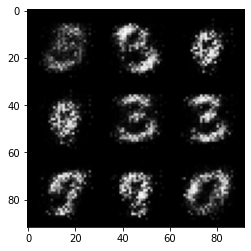

Epoch 11: Generator Loss: 3.334290869454585; Discriminator Loss: 0.08573087358843288
Epoch 12: Generator Loss: 3.389692262291654; Discriminator Loss: 0.08801446656491965
Epoch 13: Generator Loss: 3.462001217962074; Discriminator Loss: 0.07639907607868282
Epoch 14: Generator Loss: 3.580090981302485; Discriminator Loss: 0.05941332761508061
Epoch 15: Generator Loss: 3.7818301842410937; Discriminator Loss: 0.05067017862299231


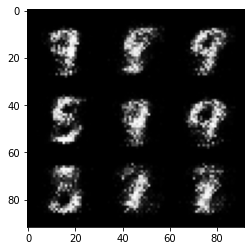

Epoch 16: Generator Loss: 3.8963819627822844; Discriminator Loss: 0.05450248976410833
Epoch 17: Generator Loss: 3.9917186028413427; Discriminator Loss: 0.061827721105995714
Epoch 18: Generator Loss: 3.6085725216977376; Discriminator Loss: 0.08330029685264712
Epoch 19: Generator Loss: 3.846720180023454; Discriminator Loss: 0.060813049386654584
Epoch 20: Generator Loss: 3.693398733891404; Discriminator Loss: 0.07016418265826158


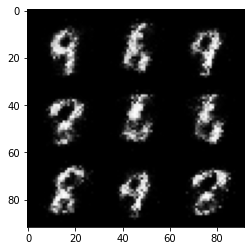

Epoch 21: Generator Loss: 3.71075640761776; Discriminator Loss: 0.06838150206865913
Epoch 22: Generator Loss: 3.907660141682574; Discriminator Loss: 0.06687202841551827
Epoch 23: Generator Loss: 3.8335039076774615; Discriminator Loss: 0.07680526197846256
Epoch 24: Generator Loss: 3.7856590722415495; Discriminator Loss: 0.08249128202417258
Epoch 25: Generator Loss: 4.017462406077111; Discriminator Loss: 0.06990554534010034


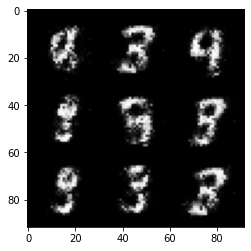

Epoch 26: Generator Loss: 3.844878005066406; Discriminator Loss: 0.08285617238994855
Epoch 27: Generator Loss: 3.8804100047804906; Discriminator Loss: 0.07809705202227463
Epoch 28: Generator Loss: 3.8546192107170123; Discriminator Loss: 0.07962684839296696
Epoch 29: Generator Loss: 3.894747094559009; Discriminator Loss: 0.09055944156449741
Epoch 30: Generator Loss: 3.817281172473802; Discriminator Loss: 0.08714576403119925


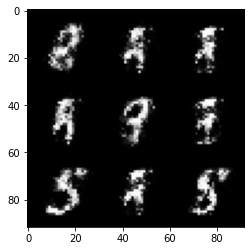

Epoch 31: Generator Loss: 3.775014854951708; Discriminator Loss: 0.08648375074651196
Epoch 32: Generator Loss: 3.679952032784663; Discriminator Loss: 0.10580535802537444
Epoch 33: Generator Loss: 3.6211639569003955; Discriminator Loss: 0.11041601257188234
Epoch 34: Generator Loss: 3.652995513192118; Discriminator Loss: 0.10356408671370701
Epoch 35: Generator Loss: 3.564371707342835; Discriminator Loss: 0.1050130806561472


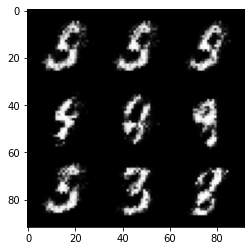

Epoch 36: Generator Loss: 3.795521081891904; Discriminator Loss: 0.09831952290939115
Epoch 37: Generator Loss: 3.5655024127919535; Discriminator Loss: 0.10805976218474445
Epoch 38: Generator Loss: 3.606023237395134; Discriminator Loss: 0.11413149383943727
Epoch 39: Generator Loss: 3.7325604627889866; Discriminator Loss: 0.12990690837663882
Epoch 40: Generator Loss: 3.5947975441336886; Discriminator Loss: 0.12450726396207616


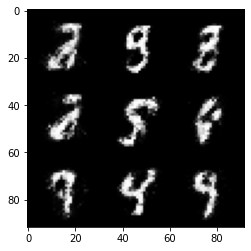

Epoch 41: Generator Loss: 3.3733012854163325; Discriminator Loss: 0.14214698267357945
Epoch 42: Generator Loss: 3.5016190492268056; Discriminator Loss: 0.1253532972861963
Epoch 43: Generator Loss: 3.462980331896719; Discriminator Loss: 0.14137667673292445
Epoch 44: Generator Loss: 3.1939278858811107; Discriminator Loss: 0.15485058370620203
Epoch 45: Generator Loss: 3.2317644207716496; Discriminator Loss: 0.14285998983678025


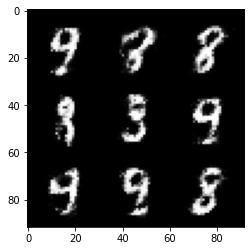

Epoch 46: Generator Loss: 3.125297221039404; Discriminator Loss: 0.16888419308387903
Epoch 47: Generator Loss: 3.065965376937313; Discriminator Loss: 0.18102685123809112
Epoch 48: Generator Loss: 3.1870207522215366; Discriminator Loss: 0.17699451120232723
Epoch 49: Generator Loss: 2.988791864309738; Discriminator Loss: 0.186191089610174
Epoch 50: Generator Loss: 2.8898012175488828; Discriminator Loss: 0.1949908115557516


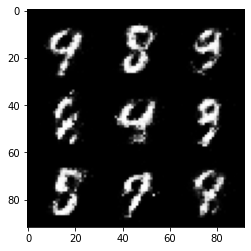

Epoch 51: Generator Loss: 2.860055135003031; Discriminator Loss: 0.17701872566869772
Epoch 52: Generator Loss: 2.9209935441454338; Discriminator Loss: 0.17007497518555695
Epoch 53: Generator Loss: 2.9685163919859603; Discriminator Loss: 0.18365815526513912
Epoch 54: Generator Loss: 2.835997001957029; Discriminator Loss: 0.19249356553943425
Epoch 55: Generator Loss: 2.805309310396597; Discriminator Loss: 0.19504985918622536


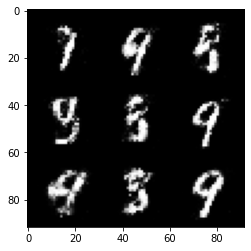

Epoch 56: Generator Loss: 2.8260490757061727; Discriminator Loss: 0.19921683961712222
Epoch 57: Generator Loss: 2.7600685370756364; Discriminator Loss: 0.21437023513352693
Epoch 58: Generator Loss: 2.6132030217632303; Discriminator Loss: 0.22803476096978828
Epoch 59: Generator Loss: 2.6660365677083226; Discriminator Loss: 0.21937919606659204
Epoch 60: Generator Loss: 2.5816856355809454; Discriminator Loss: 0.23567057688480247


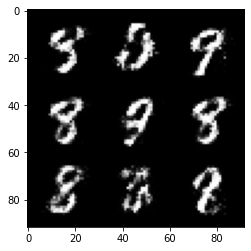

Epoch 61: Generator Loss: 2.5046286867625676; Discriminator Loss: 0.24584261029323282
Epoch 62: Generator Loss: 2.509437480715038; Discriminator Loss: 0.23261693320167598
Epoch 63: Generator Loss: 2.620587053583629; Discriminator Loss: 0.23606912073677283
Epoch 64: Generator Loss: 2.3862435225484724; Discriminator Loss: 0.26032581547302985
Epoch 65: Generator Loss: 2.457016176252223; Discriminator Loss: 0.24239710691386956


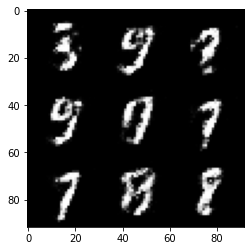

Epoch 66: Generator Loss: 2.485494979154835; Discriminator Loss: 0.23218529263157833
Epoch 67: Generator Loss: 2.401050797911849; Discriminator Loss: 0.24938520007550335
Epoch 68: Generator Loss: 2.5384933806177394; Discriminator Loss: 0.22636923152627722
Epoch 69: Generator Loss: 2.4321082454246246; Discriminator Loss: 0.23908107329024944
Epoch 70: Generator Loss: 2.5298430319788103; Discriminator Loss: 0.22094019156084385


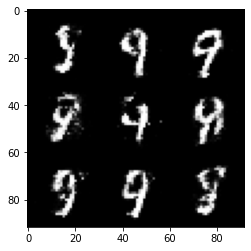

Epoch 71: Generator Loss: 2.4157370560204803; Discriminator Loss: 0.2469229511996068
Epoch 72: Generator Loss: 2.418985819511576; Discriminator Loss: 0.2451117672264449
Epoch 73: Generator Loss: 2.3706233076957752; Discriminator Loss: 0.2536366232422623
Epoch 74: Generator Loss: 2.4591473808674924; Discriminator Loss: 0.2551474110213424
Epoch 75: Generator Loss: 2.346940189282269; Discriminator Loss: 0.27367011389371426


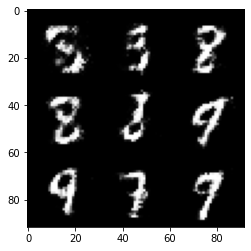

Epoch 76: Generator Loss: 2.259503607048409; Discriminator Loss: 0.28476363563461343
Epoch 77: Generator Loss: 2.2509401060624925; Discriminator Loss: 0.27382510131610227
Epoch 78: Generator Loss: 2.2758267469751807; Discriminator Loss: 0.2875269983114718
Epoch 79: Generator Loss: 2.221090706426706; Discriminator Loss: 0.2734381100897596
Epoch 80: Generator Loss: 2.226440908303901; Discriminator Loss: 0.27124716049191283


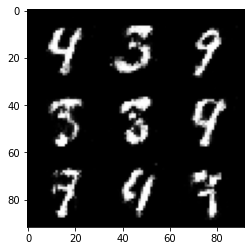

Epoch 81: Generator Loss: 2.2039684146197875; Discriminator Loss: 0.28279107230812756
Epoch 82: Generator Loss: 2.2680657420839583; Discriminator Loss: 0.26911745860632547
Epoch 83: Generator Loss: 2.2200140787848532; Discriminator Loss: 0.27722610904972184
Epoch 84: Generator Loss: 2.2281804537213943; Discriminator Loss: 0.2785372416347837
Epoch 85: Generator Loss: 2.1484518895017057; Discriminator Loss: 0.2918504934384625


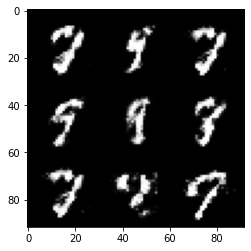

Epoch 86: Generator Loss: 2.0618971349842257; Discriminator Loss: 0.309902097720073
Epoch 87: Generator Loss: 2.086085468212933; Discriminator Loss: 0.30626644076568993
Epoch 88: Generator Loss: 2.1388615845108845; Discriminator Loss: 0.2939147478990209
Epoch 89: Generator Loss: 1.9737851136783038; Discriminator Loss: 0.3228986744306235
Epoch 90: Generator Loss: 2.0427917717362263; Discriminator Loss: 0.3129775676328236


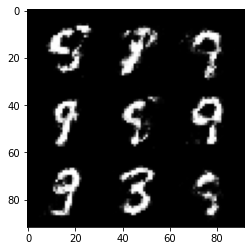

Epoch 91: Generator Loss: 2.104923482642753; Discriminator Loss: 0.2962647088999941
Epoch 92: Generator Loss: 2.1384403321788765; Discriminator Loss: 0.29224709502415364
Epoch 93: Generator Loss: 2.0080862157126225; Discriminator Loss: 0.3167930293057773
Epoch 94: Generator Loss: 2.046353838082824; Discriminator Loss: 0.3093393920644768
Epoch 95: Generator Loss: 1.9980834697101162; Discriminator Loss: 0.31589705266678003


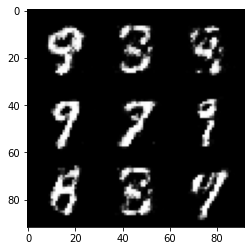

Epoch 96: Generator Loss: 1.9486155553158921; Discriminator Loss: 0.33955743174944353
Epoch 97: Generator Loss: 1.9001793185276772; Discriminator Loss: 0.3468542454847649
Epoch 98: Generator Loss: 1.9407995771497553; Discriminator Loss: 0.3398489487895579
Epoch 99: Generator Loss: 1.8355045046633496; Discriminator Loss: 0.3652614478998855
Epoch 100: Generator Loss: 1.8561194016735183; Discriminator Loss: 0.3376690422865882


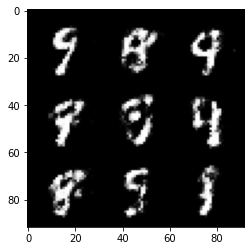

Epoch 101: Generator Loss: 1.8423193258517332; Discriminator Loss: 0.34884244921619195
Epoch 102: Generator Loss: 1.836213629383014; Discriminator Loss: 0.3380386009335772
Epoch 103: Generator Loss: 1.9065992923687771; Discriminator Loss: 0.3254362726008206
Epoch 104: Generator Loss: 1.9121972027617986; Discriminator Loss: 0.324822394324264
Epoch 105: Generator Loss: 2.0052192376366555; Discriminator Loss: 0.3039890941399247


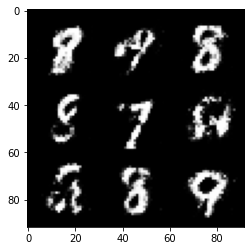

Epoch 106: Generator Loss: 1.8669420333305147; Discriminator Loss: 0.3464769157392384
Epoch 107: Generator Loss: 1.8719696416529512; Discriminator Loss: 0.33680047895481335
Epoch 108: Generator Loss: 1.9309890077058187; Discriminator Loss: 0.3185463965828739
Epoch 109: Generator Loss: 1.9430792524870524; Discriminator Loss: 0.31847479529599393
Epoch 110: Generator Loss: 1.9407202839088846; Discriminator Loss: 0.32401259631109136


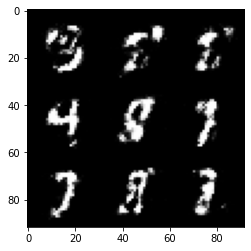

Epoch 111: Generator Loss: 1.9028825609922917; Discriminator Loss: 0.3448391916718819
Epoch 112: Generator Loss: 1.7902459518741698; Discriminator Loss: 0.3660044979566196
Epoch 113: Generator Loss: 1.7764502468902166; Discriminator Loss: 0.3638764658589353
Epoch 114: Generator Loss: 1.8666317958567442; Discriminator Loss: 0.33304304195873774
Epoch 115: Generator Loss: 1.7825527267415386; Discriminator Loss: 0.35952845825823637


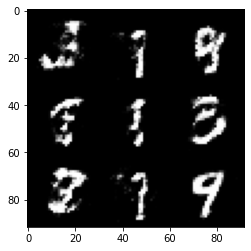

Epoch 116: Generator Loss: 1.7585927570806636; Discriminator Loss: 0.36401284910214227
Epoch 117: Generator Loss: 1.725909019329909; Discriminator Loss: 0.37956329589205257
Epoch 118: Generator Loss: 1.676433960766172; Discriminator Loss: 0.38724695384375324
Epoch 119: Generator Loss: 1.6366612850221745; Discriminator Loss: 0.3937897075340946
Epoch 120: Generator Loss: 1.7072088812460016; Discriminator Loss: 0.359908406922558


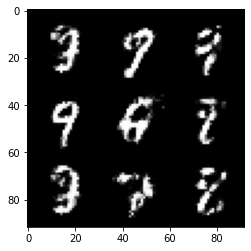

Epoch 121: Generator Loss: 1.6828293663098106; Discriminator Loss: 0.38887554019498927
Epoch 122: Generator Loss: 1.7238155247560187; Discriminator Loss: 0.3609275057880101
Epoch 123: Generator Loss: 1.692659273838946; Discriminator Loss: 0.3779350026075774
Epoch 124: Generator Loss: 1.6876316177311228; Discriminator Loss: 0.3827659278027793
Epoch 125: Generator Loss: 1.5849227297789; Discriminator Loss: 0.3997950615532109


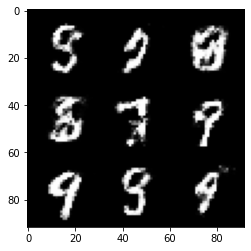

Epoch 126: Generator Loss: 1.6049352424231165; Discriminator Loss: 0.38901992838011623
Epoch 127: Generator Loss: 1.6028503982751354; Discriminator Loss: 0.4023008305889203
Epoch 128: Generator Loss: 1.578153921342862; Discriminator Loss: 0.4041859708361026
Epoch 129: Generator Loss: 1.5260163098255963; Discriminator Loss: 0.41497842157319154
Epoch 130: Generator Loss: 1.5760958469244464; Discriminator Loss: 0.3987219446122265


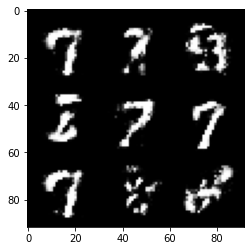

Epoch 131: Generator Loss: 1.5935923318618905; Discriminator Loss: 0.40777257644037196
Epoch 132: Generator Loss: 1.5569315226093283; Discriminator Loss: 0.4056162498017618
Epoch 133: Generator Loss: 1.4443322707340915; Discriminator Loss: 0.43771196263177053
Epoch 134: Generator Loss: 1.4524780527106735; Discriminator Loss: 0.43738966080934
Epoch 135: Generator Loss: 1.4690402065004622; Discriminator Loss: 0.4293348400323376


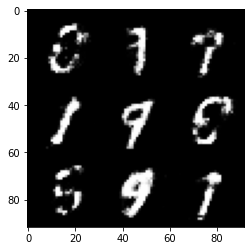

Epoch 136: Generator Loss: 1.4875277003753922; Discriminator Loss: 0.4311051859911571
Epoch 137: Generator Loss: 1.4070162821426067; Discriminator Loss: 0.46675216236602524
Epoch 138: Generator Loss: 1.4443731323234055; Discriminator Loss: 0.439266101002439
Epoch 139: Generator Loss: 1.4730204740312816; Discriminator Loss: 0.4287994158293393
Epoch 140: Generator Loss: 1.520639410913626; Discriminator Loss: 0.4108483342727873


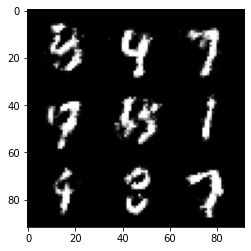

Epoch 141: Generator Loss: 1.564997031998787; Discriminator Loss: 0.4027988652684795
Epoch 142: Generator Loss: 1.622184173384709; Discriminator Loss: 0.3852673561207013
Epoch 143: Generator Loss: 1.4419658572943226; Discriminator Loss: 0.4459383781276532
Epoch 144: Generator Loss: 1.5147439289703044; Discriminator Loss: 0.4160983057291523
Epoch 145: Generator Loss: 1.2871371170859347; Discriminator Loss: 0.5192436906320455


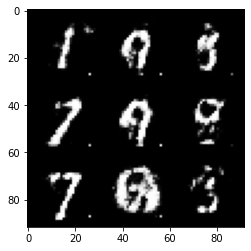

Epoch 146: Generator Loss: 1.5034252738139269; Discriminator Loss: 0.40648273033882254
Epoch 147: Generator Loss: 1.4776690575613904; Discriminator Loss: 0.42413133274771764
Epoch 148: Generator Loss: 1.4222022106906753; Discriminator Loss: 0.4526052540426315
Epoch 149: Generator Loss: 1.3232298675122292; Discriminator Loss: 0.46712014473069197
Epoch 150: Generator Loss: 1.2925344583576421; Discriminator Loss: 0.4751341527840222


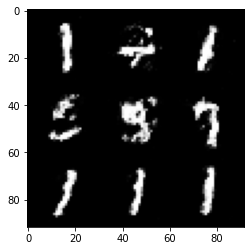

Epoch 151: Generator Loss: 1.3759736979185646; Discriminator Loss: 0.4473066240993898
Epoch 152: Generator Loss: 1.4076881744205825; Discriminator Loss: 0.45501600151885546
Epoch 153: Generator Loss: 1.3733901110793483; Discriminator Loss: 0.45094027988183727
Epoch 154: Generator Loss: 1.343563515494373; Discriminator Loss: 0.46493907517461636
Epoch 155: Generator Loss: 1.3761592747560187; Discriminator Loss: 0.4510939304889646


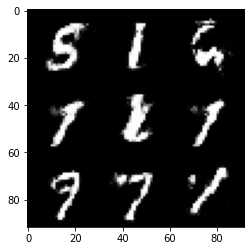

Epoch 156: Generator Loss: 1.3829870884860758; Discriminator Loss: 0.44181621322499665
Epoch 157: Generator Loss: 1.340316249871813; Discriminator Loss: 0.4534839367561503
Epoch 158: Generator Loss: 1.3583843011591734; Discriminator Loss: 0.4625819922764418
Epoch 159: Generator Loss: 1.3186970417941812; Discriminator Loss: 0.4795016071308396
Epoch 160: Generator Loss: 1.3104956772790026; Discriminator Loss: 0.47415958583227863


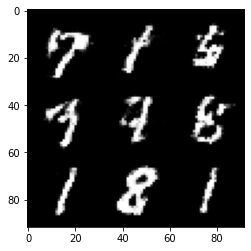

Epoch 161: Generator Loss: 1.3202363100133216; Discriminator Loss: 0.4652662202874735
Epoch 162: Generator Loss: 1.381543942606017; Discriminator Loss: 0.4452251016712392
Epoch 163: Generator Loss: 1.2485943160839934; Discriminator Loss: 0.49886607170613334
Epoch 164: Generator Loss: 1.3124276895258726; Discriminator Loss: 0.4659724385499446
Epoch 165: Generator Loss: 1.2797298314474792; Discriminator Loss: 0.4677611937019617


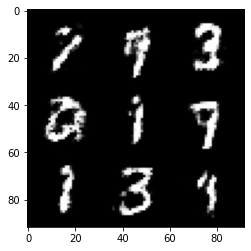

Epoch 166: Generator Loss: 1.3706346074147011; Discriminator Loss: 0.4359531360013144
Epoch 167: Generator Loss: 1.30835184918792; Discriminator Loss: 0.4662354810913997
Epoch 168: Generator Loss: 1.1653833835363896; Discriminator Loss: 0.5555344965539253
Epoch 169: Generator Loss: 1.3217551237992895; Discriminator Loss: 0.44815015646694567
Epoch 170: Generator Loss: 1.3960307333260966; Discriminator Loss: 0.44927255202458105


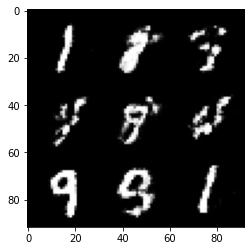

Epoch 171: Generator Loss: 1.3019987987811124; Discriminator Loss: 0.45825099296915506
Epoch 172: Generator Loss: 1.3419424455557296; Discriminator Loss: 0.44868909206980073
Epoch 173: Generator Loss: 1.2720864660450135; Discriminator Loss: 0.47406871613663143
Epoch 174: Generator Loss: 1.198011004721432; Discriminator Loss: 0.5067641464377771
Epoch 175: Generator Loss: 1.2012822648355448; Discriminator Loss: 0.49544714654940786


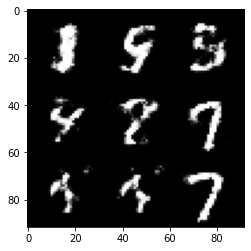

Epoch 176: Generator Loss: 1.2385163472405374; Discriminator Loss: 0.49128099316472945
Epoch 177: Generator Loss: 1.2084576961582403; Discriminator Loss: 0.49511346919958527
Epoch 178: Generator Loss: 1.2134349602880254; Discriminator Loss: 0.4926590989393466
Epoch 179: Generator Loss: 1.184830612211085; Discriminator Loss: 0.5082442646087614
Epoch 180: Generator Loss: 1.1993257424978814; Discriminator Loss: 0.5082913379171001


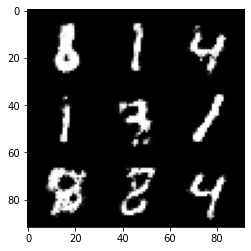

Epoch 181: Generator Loss: 1.2072684586937747; Discriminator Loss: 0.5091407717163883
Epoch 182: Generator Loss: 1.195203392490395; Discriminator Loss: 0.5063107312996504
Epoch 183: Generator Loss: 1.1608103274790718; Discriminator Loss: 0.5181824814027814
Epoch 184: Generator Loss: 1.1715649329523035; Discriminator Loss: 0.5090701130788717
Epoch 185: Generator Loss: 1.1376811741257526; Discriminator Loss: 0.5183235270255155


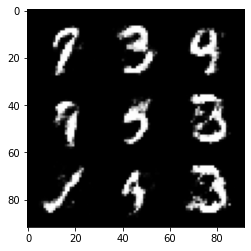

Epoch 186: Generator Loss: 1.1462112304244214; Discriminator Loss: 0.5177414414089626
Epoch 187: Generator Loss: 1.22318522660717; Discriminator Loss: 0.487883833298551
Epoch 188: Generator Loss: 1.1607113509798355; Discriminator Loss: 0.5096086129577938
Epoch 189: Generator Loss: 1.167525185577905; Discriminator Loss: 0.5120798141590314
Epoch 190: Generator Loss: 1.16772956037318; Discriminator Loss: 0.5061407972500522


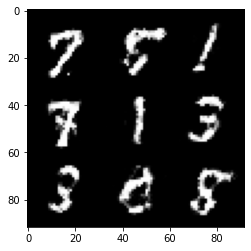

Epoch 191: Generator Loss: 1.1005793104547936; Discriminator Loss: 0.5270602382195275
Epoch 192: Generator Loss: 1.083016532316391; Discriminator Loss: 0.5353975722403415
Epoch 193: Generator Loss: 1.1148282412781136; Discriminator Loss: 0.5249528970037188
Epoch 194: Generator Loss: 1.1630373966973473; Discriminator Loss: 0.5095302734547841
Epoch 195: Generator Loss: 1.1475512548042004; Discriminator Loss: 0.5148808475750596


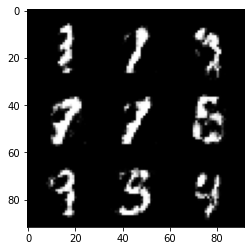

Epoch 196: Generator Loss: 1.120612424319741; Discriminator Loss: 0.5247004949080665
Epoch 197: Generator Loss: 1.1546670597499367; Discriminator Loss: 0.5134028859102904
Epoch 198: Generator Loss: 1.1493101671560486; Discriminator Loss: 0.5074046435259553
Epoch 199: Generator Loss: 1.1463212312411653; Discriminator Loss: 0.5141082409221226
Epoch 200: Generator Loss: 1.093174509529366; Discriminator Loss: 0.5427511671840001


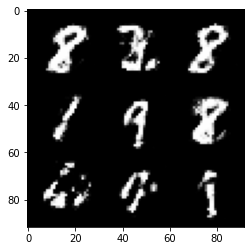

In [11]:
loss_hist = {}
loss_hist["generator loss"] = []
loss_hist["discriminator loss"] = []

for epoch in range(1, NUM_EPOCHES+1):
    
    epoch_d_loss = 0
    epoch_g_loss = 0
    
    for real, label in trainloader:
        b = real.size(0)
        real = real.view(b, -1).to(device)
        
        d_optimizer.zero_grad()
        noise = torch.randn(b, latent_dim).to(device)
        fake = g(noise)
        fake_pred = d(fake.detach())
        real_pred = d(real)
        fake_loss = criterion(fake_pred, torch.zeros_like(fake_pred))
        real_loss = criterion(real_pred, torch.ones_like(real_pred))
        d_loss = (real_loss + fake_loss) / 2
        d_loss.backward()
        epoch_d_loss += d_loss.item()
        d_optimizer.step()
        
        g_optimizer.zero_grad()
        noise = torch.randn(b, latent_dim).to(device)
        fake = g(noise)
        pred = d(fake)
        g_loss = criterion(pred, torch.ones_like(pred))
        g_loss.backward()
        epoch_g_loss += g_loss.item()
        g_optimizer.step()
    
    epoch_g_loss /= len(trainloader)
    epoch_d_loss /= len(trainloader)
    
    loss_hist["generator loss"].append(epoch_g_loss)
    loss_hist["discriminator loss"].append(epoch_d_loss)
    
    print("Epoch {}: Generator Loss: {}; Discriminator Loss: {}".format(epoch, epoch_g_loss, epoch_d_loss))
    
    if epoch%5==0:
        noise = torch.randn(b, latent_dim).to(device)
        fake = g(noise)
    
        images = fake.detach().to("cpu").view(-1, 1, 28, 28)
        images_grid = make_grid(images[:9], nrow=3)
        plt.imshow(images_grid.permute(1, 2, 0).squeeze())
        plt.show()